In [1]:
import time
start_time = time.time()
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel("online_retail/Online Retail.xlsx")
df1.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data cleaning: Handling missing Values


In [3]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [5]:
df1.StockCode=="21139"
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
df1[["StockCode","Description"]].value_counts()

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    2302
22423      REGENCY CAKESTAND 3 TIER              2200
85099B     JUMBO BAG RED RETROSPOT               2159
47566      PARTY BUNTING                         1727
20725      LUNCH BAG RED RETROSPOT               1638
                                                 ... 
90210D     check                                    1
23400      check                                    1
23397      damaged                                  1
72807C     ???missing                               1
23395      check                                    1
Name: count, Length: 4792, dtype: int64

In [7]:
# most_freq = df1[["StockCode","Description"]].value_counts().reset_index()
# most_freq

# value_counts() --> counts the most repeated stockcode and description column in  values in decending order
#afer value_counts its in series so then its need to converting to DataFrame

In [8]:
most_freq = (
    df1[["StockCode", "Description"]]
    .value_counts()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    # .drop_duplicates("StockCode")
    .rename(columns={"Description": "freq_Description"})
)


In [9]:
most_freq.columns = ["StockCode","freq_Description","count"]
df2 = df1.merge(most_freq, on="StockCode", how="left")
#or
# df2 = pd.merge(df1,most_freq, on="StockCode", how="left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0


In [10]:
df2.dropna(subset=["Description"],inplace=True)
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
...,...,...,...,...,...,...,...,...,...,...
711026,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL,320.0
711027,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,307.0
711028,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,KIDS CUTLERY DOLLY GIRL,8.0
711029,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,162.0


In [11]:
df2.drop(columns=["freq_Description","count"],inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,709037.000000,709037,709037.000000,539843.000000
mean,9.760825,2011-07-05 13:18:23.951528192,4.421866,15290.162562
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-29 15:12:00,1.250000,13956.000000
50%,3.000000,2011-07-21 09:30:00,2.100000,15152.000000
75%,10.000000,2011-10-19 10:59:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,193.986064,NaN,84.637405,1709.392583


In [13]:
#df2[df2.UnitPrice<0]
df3 = df2[(df2.UnitPrice>0)&(df2.Quantity>0)]
df3.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,693945.000000,693945,693945.000000,527365.000000
mean,10.873889,2011-07-05 15:59:13.143203328,3.874301,15296.797165
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-29 15:20:00,1.250000,13969.000000
50%,4.000000,2011-07-21 10:44:00,2.100000,15159.000000
75%,12.000000,2011-10-19 11:49:00,4.130000,16794.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,137.669424,NaN,31.507544,1708.785281


In [14]:
df4 = df3.copy()
df4["TotalPrice"] = df4["Quantity"] * df4["UnitPrice"]
df4.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 693945 entries, 0 to 711030
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    693945 non-null  object        
 1   StockCode    693945 non-null  object        
 2   Description  693945 non-null  object        
 3   Quantity     693945 non-null  int64         
 4   InvoiceDate  693945 non-null  datetime64[ns]
 5   UnitPrice    693945 non-null  float64       
 6   CustomerID   527365 non-null  float64       
 7   Country      693945 non-null  object        
 8   TotalPrice   693945 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 52.9+ MB


In [16]:
df4["Month"] = df4["InvoiceDate"].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
29967,538177,22555,PLASTERS IN TIN STRONGMAN,1,2010-12-10 09:51:00,3.36,NaN,United Kingdom,3.36,12
572227,574074,23318,BOX OF 6 MINI VINTAGE CRACKERS,3,2011-11-02 15:33:00,4.96,NaN,United Kingdom,14.88,11
668091,579196,22614,PACK OF 12 SPACEBOY TISSUES,1,2011-11-28 15:54:00,0.83,14096.0,United Kingdom,0.83,11
119756,544211,22746,POPPY'S PLAYHOUSE LIVINGROOM,6,2011-02-17 11:05:00,2.10,13018.0,United Kingdom,12.60,2
83777,541684,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,1,2011-01-20 15:22:00,2.95,15498.0,United Kingdom,2.95,1


## Visualization and Eda


### Plot monthly sales


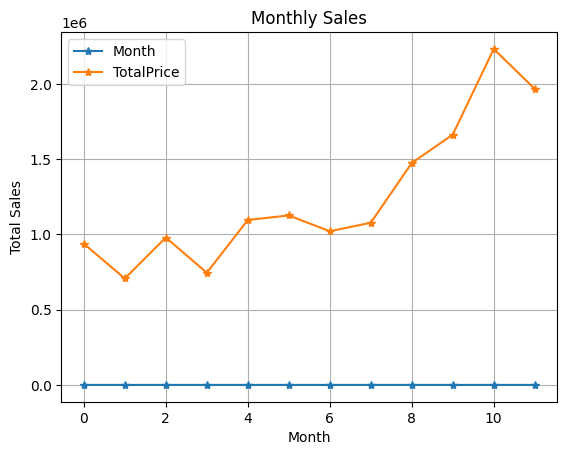

In [17]:
monthly_sales = df4.groupby("Month",as_index=False)["TotalPrice"].sum()
monthly_sales
monthly_sales.plot(kind="line",title="Monthly Sales",marker="*")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

### Insights
- Total sales started rising in August


### Top 5 Countries


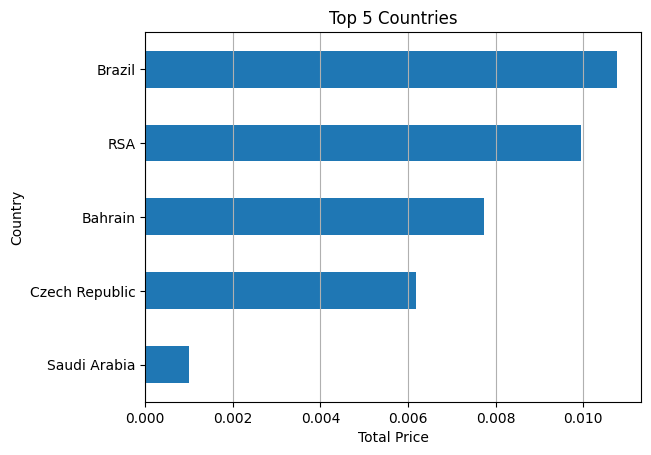

In [18]:
country_wise_sales = df4.groupby("Country")["TotalPrice"].sum()
total_sales = country_wise_sales.sum()
top5_countries = country_wise_sales.sort_values(ascending=True).head(5)
percentage = (top5_countries / total_sales) * 100
percentage.plot(kind="barh",title="Top 5 Countries")
# kind = "barh"--> horizontal bar chart
plt.xlabel("Total Price")
plt.ylabel("Country")
plt.grid(axis="x")
plt.show()

### Top 5 Products

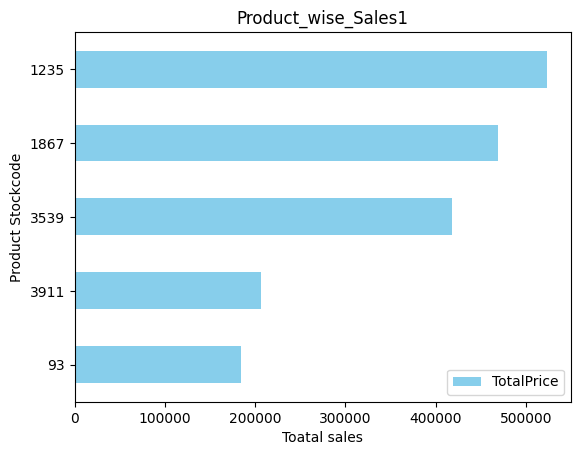

In [19]:
product_wise_sales = df4.groupby("StockCode",as_index=False)["TotalPrice"].sum()
top_5_prooducts = product_wise_sales.sort_values("TotalPrice",ascending=False).head(5)
top_5_prooducts.plot(kind="barh", color="skyblue")
plt.title("Product_wise_Sales1")
plt.xlabel("Toatal sales")
plt.ylabel("Product Stockcode")
plt.gca().invert_yaxis() #To show highest sales at the top
plt.show()

In [20]:
# df4["InvoiceDate"].max() --> last purchased date
current_date = df4["InvoiceDate"].max() + pd.Timedelta(days=2)# adding 2 days to last date not real current date
current_date



Timestamp('2011-12-11 12:50:00')

In [21]:
rmf = df4.groupby("CustomerID").agg({
    "InvoiceDate":lambda x:(current_date - x.max()).days,
    "InvoiceNo" : "count",
    "TotalPrice" : "sum"

})

rmf.columns = ["Recency","Frequency","Monetary"]
rmf.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,327,1,77183.60
12347.0,3,227,5971.21
12348.0,76,34,1930.44
12349.0,20,92,2165.86
12350.0,311,19,364.40


In [22]:
df4[df4.CustomerID==12347]["TotalPrice"].sum()


np.float64(5971.210000000001)

In [23]:
#end time
end_time = time.time()

In [24]:
# total time
total_time = end_time - start_time


print(f"Total Execution Time: {total_time} seconds")

Total Execution Time: 92.73512005805969 seconds
